In [12]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from datetime import datetime
import matplotlib.pyplot as plt
#from keras.utils import plot_model

In [13]:

# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [14]:

# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together

In [15]:

model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
#plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
# fit model
history = model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0, validation_data=(seq_in, [seq_in,seq_out]))

W1014 16:16:41.879920 14880 deprecation.py:323] From c:\users\t-gamer\documents\git\estudomachinelearningpython\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1014 16:16:42.847920 14880 deprecation_wrapper.py:119] From c:\users\t-gamer\documents\git\estudomachinelearningpython\venv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1014 16:16:42.940919 14880 deprecation_wrapper.py:119] From c:\users\t-gamer\documents\git\estudomachinelearningpython\venv\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



In [22]:
history.history

{'val_loss': [0.6199139952659607,
  0.5907639265060425,
  0.5615042448043823,
  0.5321692824363708,
  0.5017128586769104,
  0.47015517950057983,
  0.4377208948135376,
  0.4038708209991455,
  0.3677940368652344,
  0.3292561173439026,
  0.2882957458496094,
  0.24498644471168518,
  0.1999041736125946,
  0.15390042960643768,
  0.10838828980922699,
  0.06610765308141708,
  0.031648315489292145,
  0.012263637036085129,
  0.016675449907779694,
  0.04256422445178032,
  0.06679370999336243,
  0.07128925621509552,
  0.058098241686820984,
  0.038179926574230194,
  0.020686723291873932,
  0.009751694276928902,
  0.0055339140817523,
  0.006286449730396271,
  0.00983614381402731,
  0.014335810206830502,
  0.018488682806491852,
  0.021530114114284515,
  0.023114092648029327,
  0.023187365382909775,
  0.02189679443836212,
  0.019525649026036263,
  0.01644791290163994,
  0.013085958547890186,
  0.009873061440885067,
  0.007209676317870617,
  0.005402268376201391,
  0.004603876266628504,
  0.00476667610

<module 'matplotlib.pyplot' from 'c:\\users\\t-gamer\\documents\\git\\estudomachinelearningpython\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

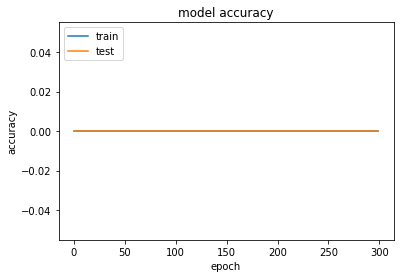

In [19]:
time = datetime.now()
timestampStr = time.strftime("%d %b %Y %H %M %S %f)")
plt.plot(history.history['time_distributed_6_acc'])
plt.plot(history.history['val_time_distributed_6_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt

<module 'matplotlib.pyplot' from 'c:\\users\\t-gamer\\documents\\git\\estudomachinelearningpython\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

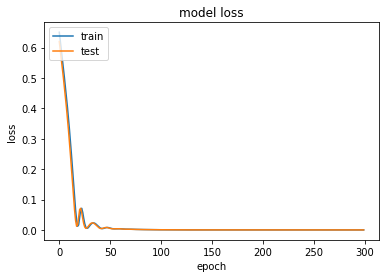

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss"+timestampStr+".png")
plt

In [21]:

# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)

[array([[[0.10770944],
        [0.20489614],
        [0.30232635],
        [0.39992467],
        [0.49793902],
        [0.59641165],
        [0.69630295],
        [0.7986642 ],
        [0.90467185]]], dtype=float32), array([[[0.16702174],
        [0.29013923],
        [0.40317488],
        [0.50878376],
        [0.60901105],
        [0.7054922 ],
        [0.7995923 ],
        [0.8925072 ]]], dtype=float32)]
